# Runtime analysis

### Stefan Bordei


## __CONTENTS:__

1. Writing an algorithm to compute the factorial of a positive integer n
2. For different values of n, implementing the algorithm using two approaches: iterative and recursive (tail and non-tail recursion). For each case, plot running time as a function of n and compare the achieved results.
3. Using one of the sequences obtained from task 2 as an input for search algorithms. Implementing with two methods from: linear search, iterative binary and recursive binary.
4. For each approach, compute the best and worst running times. Give some examples by plotting the running time as a function of n.
5. Use curve-fitting algorithms to find the equation of the running times obtained from Tasks 2-4.


## Report

I started by using `pyperf system tune` in parallel with `os.sched_setaffinity(pid)`that set the CPU core affinity to 4 separate cores (out of 8), in order to tune my system to run benchmarks. I did a comparison between running the factorial functions with and without the pyperf system tune and in the latter it was hard to differentiate between some of the runtimes plots.



In [34]:
from scipy.optimize import curve_fit
from time import perf_counter_ns
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import arange
import timeit
import math
import os

### Using `os.sched_getaffinity()` to set the affinity to cores 0, 1, 6 and 7 out of a total of 8 eligible cores using PID.

I decided to set the affinity mask for cores 0, 1, 6, 7.

```
Number of CPUs: 8
Process is eligible to run on: {0, 1, 2, 3, 4, 5, 6, 7}
PID: 3623
CPU affinity mask is modified for process id 3623
Now, process is eligible to run on: {0, 1, 6, 7}
```

In [45]:
print("Number of CPUs:", os.cpu_count())
pid = 0
affinity = os.sched_getaffinity(pid)
print("Process is eligible to run on:", affinity)
affinity_mask = {0, 1, 6, 7}
pid = os.getpid()
print("PID: %d" %pid)
os.sched_setaffinity(pid, affinity_mask)
print("CPU affinity mask is modified for process id % s" % pid) 
pid = os.getpid()
affinity = os.sched_getaffinity(pid)
print("Now, process is eligible to run on:", affinity)

Number of CPUs: 8
Process is eligible to run on: {0, 1, 2, 3, 4, 5, 6, 7}
PID: 3623
CPU affinity mask is modified for process id 3623
Now, process is eligible to run on: {0, 1, 6, 7}


## __Factorial functions__

__Implemented:__
- Iterative
- Recursive (non tail)
- Tail Recursive
- Python's Math Factorial
- Fold

I have decided to implement all of the 3 factorial functions suggested and also include 2 more for comparisons as the factorial function from the Math module in Python3 and the fold factorial will show a bigger difference in runtimes from the iterative and recursive functions.

In order to get a more accurate representation of the runtimes I also implemented a `bench` function that would return the avg time of 1000 runs of a function.

__Algorithms:__

1. __Iterative factorial:__
 - Input: integer
 - initialize factorial variable with 1
 - for numbers in range 2 to input + 1 factorial += number
 - return factorial


2. __Recursive factorial:__
 - Input: integer
 - if input is 0 return 1
 - else return factorial function with $n - 1$ as argument n times


3. __Tail recursive factorial:__
 - Input: integer, accumulator = 1
 - if input is 0 return accumulator
 - else return factorial function with $n - 1$ as argument n times



In [35]:
def iterative_factorial(n):
    """
        Iterative factorial function.
        n: input number 
    """
    fact = 1
    for num in range(2, n + 1):
        fact *= num
    return fact

def recursive_factorial(n):
    """
        Recursive factorial function.
        n: input number 
    """
    if n == 0: 
        return 1
    else: 
        return recursive_factorial(n-1) * n

def tail_recursive_factorial(n, accumulator=1):
    """
        Tail recursive factorial function.
        n: input number 
    """
    if n == 0: 
        return accumulator
    else: 
        return tail_recursive_factorial(n-1, accumulator * n)
    
def fold_factorial(n):
    """
        Fold factorial function.
        n: input number 
    """
    return reduce(lambda x, y : x * y, range(1, n))


def bench(factorial_func, n, reps=1000):
    """
        Benchmarking.
        factorial_func: factorial function as an input
        n: input for the factorial function
        reps: number of repetitions. Default is 1000
    """
    start = perf_counter_ns()
    for _ in range(reps):
        factorial_func(n)
    return (perf_counter_ns() - start) / reps

## Running the factorial functions and plotting the runtimes for a range of inputs 2 - N.

I have decided to use N as 200 as using a larger number can result in a Stack Overflow or in Python having to use Big Numbers in order to store the results of the factorial and that will result in the runtime of that operation to be included in the total runtime of the factorial functions.

The factorial functions were run 2 times in order to compare results between using `pyperf system tune` and using the default system configuration.

In [52]:
# Not using 'pyperf system tune'

N = 100
inputs = list(range(2, N))

times_iterative = [bench(iterative_factorial, n) for n in inputs]
times_recursive = [bench(recursive_factorial, n) for n in inputs]
times_tail_recursive = [bench(tail_recursive_factorial, n) for n in inputs]
times_python = [bench(math.factorial, n) for n in inputs]
times_fold = [bench(fold_factorial, n) for n in inputs]


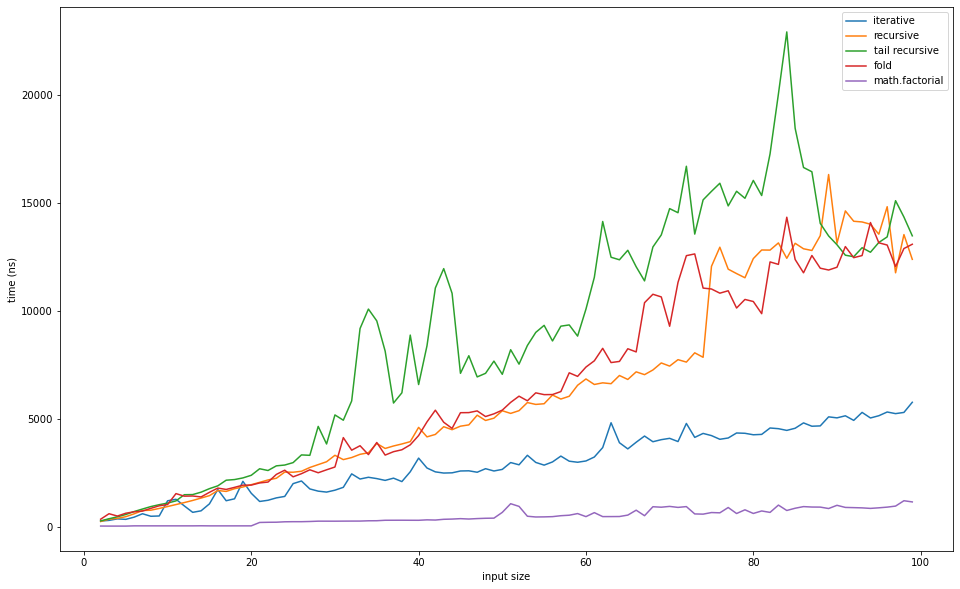

In [53]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(inputs, times_iterative, label='iterative')
ax.plot(inputs, times_recursive, label='recursive')
ax.plot(inputs, times_tail_recursive, label='tail recursive')
ax.plot(inputs, times_fold, label='fold')
ax.plot(inputs, times_python, label='math.factorial')
ax.set(xlabel='input size', ylabel='time (ns)')
ax.legend()
# plt.savefig('default_sys_factorial.png')
plt.show()

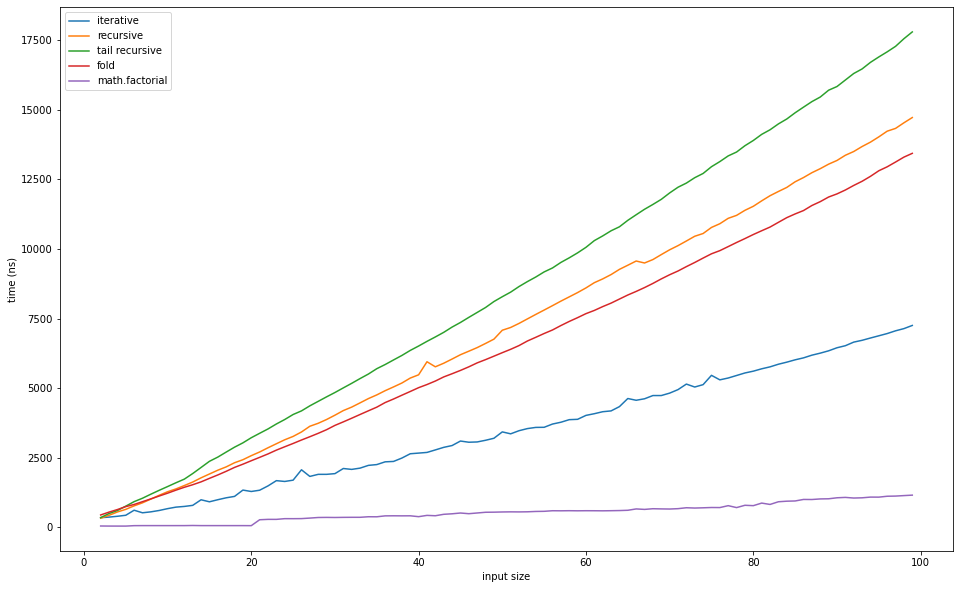

In [6]:
# Using 'pyperf system tune'

N = 100
inputs = list(range(2, N))

times_iterative = [bench(iterative_factorial, n) for n in inputs]
times_recursive = [bench(recursive_factorial, n) for n in inputs]
times_tail_recursive = [bench(tail_recursive_factorial, n) for n in inputs]
times_python = [bench(math.factorial, n) for n in inputs]
times_fold = [bench(fold_factorial, n) for n in inputs]


fig, ax = plt.subplots(figsize=(16,10))
ax.plot(inputs, times_iterative, label='iterative')
ax.plot(inputs, times_recursive, label='recursive')
ax.plot(inputs, times_tail_recursive, label='tail recursive')
ax.plot(inputs, times_fold, label='fold')
ax.plot(inputs, times_python, label='math.factorial')
ax.set(xlabel='input size', ylabel='time (ns)')
ax.legend()
# plt.savefig('tuned_sys_factorial.png')
plt.show()

The results of the iterative factorial were saved in a variable `sequence_obtained` to be used as input for the search algorithms.

In [5]:
sequence_obtained = [iterative_factorial(n) for n in inputs]

### __Implementing Linear and Binary search__

__Algorithms:__

1. __Linear search:__
 - Input: array and element to be found
 - iterate through the array and check if the element exists
 - if found return the index of the element
 

2. __Binary search:__
 - Input: array and element to be found
 - initialize lower and mid to 0 and high to the length of the array
 - as long as low <= high
  - mid = middle of the array
  - if mid < element low becomes mid
  - if mix > element high becomes mid
  - if mid = element return mid


I also implemented a `bench_search` function that would return the avg time of 1000 runs of a search function.


In [6]:
def linear_search(arr, elem):
    """
        Linear search function.
        arr: array to be searched on
        element: element to search in array
    """
    for i in range (len(arr)):
        if arr[i] == elem:
            return i
    return -1


def binary_search(arr, elem):
    """
        Binary search function.
        arr: array to be searched on
        element: element to search in array
    """
    low = 0
    high = len(arr) - 1
    mid = 0
 
    while low <= high:
        mid = (high + low) // 2
        if arr[mid] < elem:
            low = mid + 1
        elif arr[mid] > elem:
            high = mid - 1
        else:
            return mid
    return -1


def bench_search(search_func, n, elem, reps=1000):
    """
        Benchmarking.
        search_func: search function as an input
        n: input array for the search function
        elem: element to be searched in the input array
        reps: number of repetitions. Default is 1000
    """
    start = perf_counter_ns()
    for _ in range(reps):
        search_func(n, elem)
    return (perf_counter_ns() - start) / reps

### __Runtimes__

I decided to run each search algorithm 1000 times, each time returning the avg of 1000 runs and store the results in separate arrays. With each iteration I am modifying the size of the input array in order to see how the runtimes are affected by the size of the input. 

I used the mean of each list in order to do a barplot of the runtimes for the best and worst times of the linear and binary searches.

The worst time of the linear search stands out as seen on the plot below. There is not a big difference between the best and worst times for the binary search algorithm, in fact they are both relatively close in values to the best time of the linear search.

In [7]:
times_best_linear_search, times_worst_linear_search, times_best_binary_search, times_worst_binary_search = [], [], [], []


for i in range(1000):
    times_best_linear_search.append(bench_search(linear_search, sequence_obtained, sequence_obtained[0]))
    times_worst_linear_search.append(bench_search(linear_search, sequence_obtained, sequence_obtained[-1]))
    times_best_binary_search.append(bench_search(binary_search, sequence_obtained, sequence_obtained[len(sequence_obtained) // 2]))
    times_worst_binary_search.append(bench_search(binary_search, sequence_obtained, sequence_obtained[0]))
    sequence_obtained.append(i)

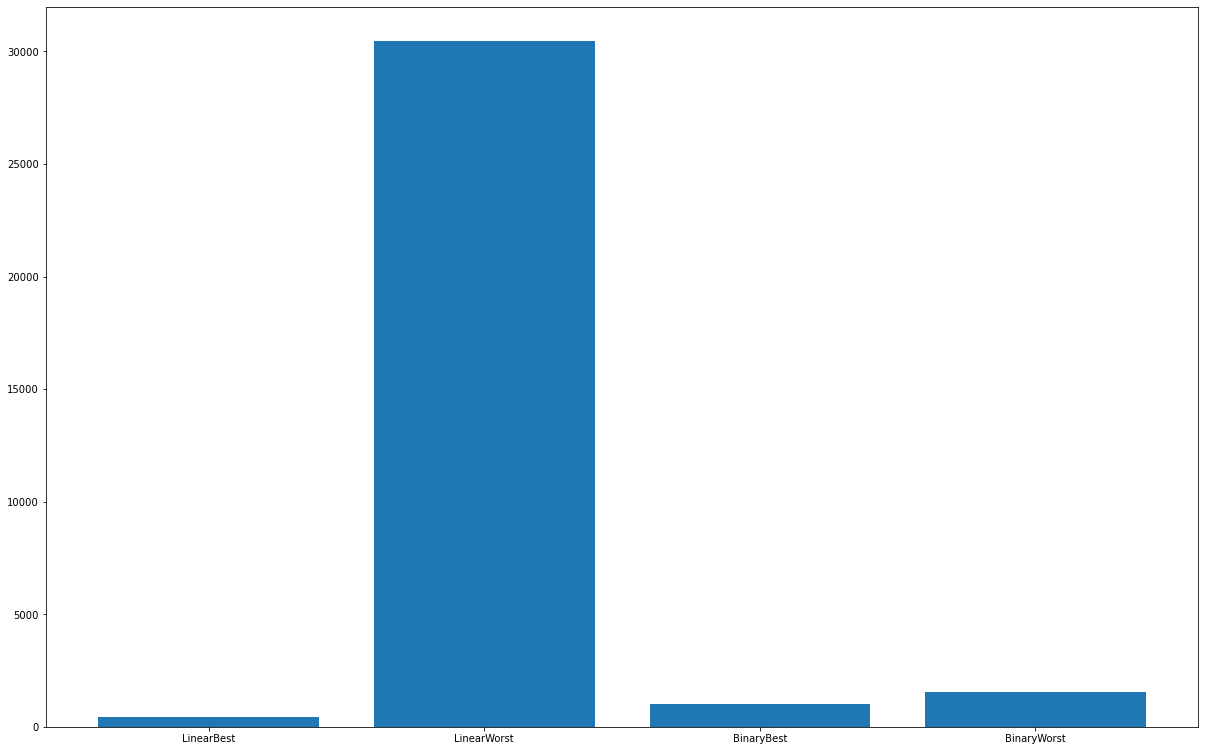

In [44]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes([0,0,1,1])
linear_searches = ['LinearBest', 'LinearWorst', 'BinaryBest', 'BinaryWorst']
times = [np.mean(times_best_linear_search),np.mean(times_worst_linear_search), np.mean(times_best_binary_search), np.mean(times_worst_binary_search)]
ax.bar(linear_searches,times)
#plt.savefig('best_worst_times_search.png')
plt.show()

### __Curve fitting and $a$ and $b$ in $T(n) = a * n + b$__

I started with the function `objective` that takes 3 arguments (x, a, b) and returns $a * x + b$.
I decided to use the worst times for both binary and linear searches as the best times will always be O(1). The worst times however are different for the 2 algorithms. Binary search has a O(logn) complexity and linear search has a O(n) complexity. For the factorial I only used the times that resulted from the iterative factorial. The complexity of the factorial is O(n).

__Results:__
- __Binary search:__ $y = 0.91903 * x + 124.44971$
- __Linear search:__ $y = 0.99134 * x + 213.96668$
- __Factorial (iterative):__ $y = 0.99392 * x + (-48.26173)$


In [ ]:
# general form of linear running times
def objective(x, a, b):
	return a * x + b

y = 0.91903 * x + 124.44971


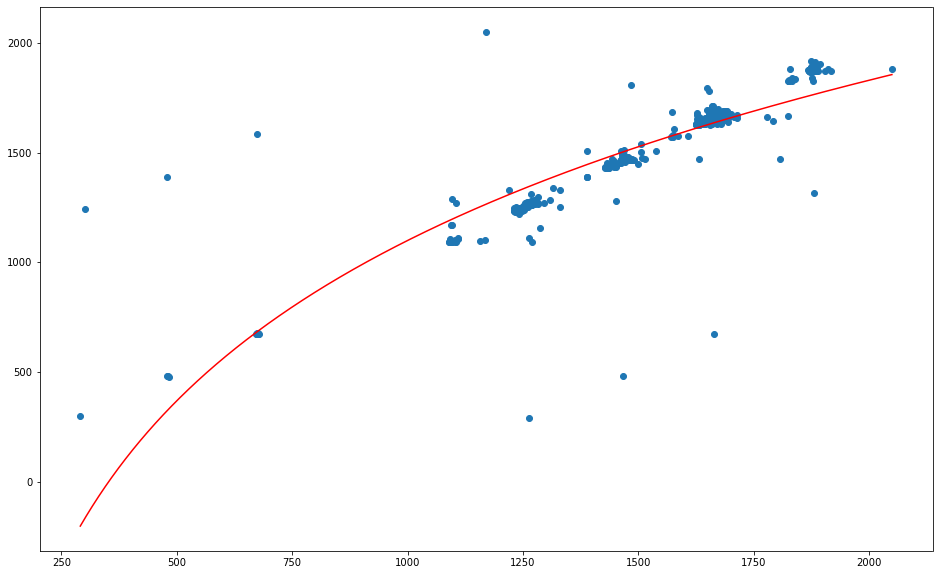

In [9]:
# worst time binary search curve fitting
data = times_worst_binary_search

fig, ax = plt.subplots(figsize=(16,10))
x, y = data[1:], data[:-1]
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

# Use log(x) as the input to polyfit.
coefficients = np.polyfit(np.log(x),y,1) 
fit = np.poly1d(coefficients) 

plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, fit(np.log(x_line)), '-', color='red')
#plt.savefig('binary_worst_curve_fit.png')
plt.show()

y = 0.99134 * x + 213.96668


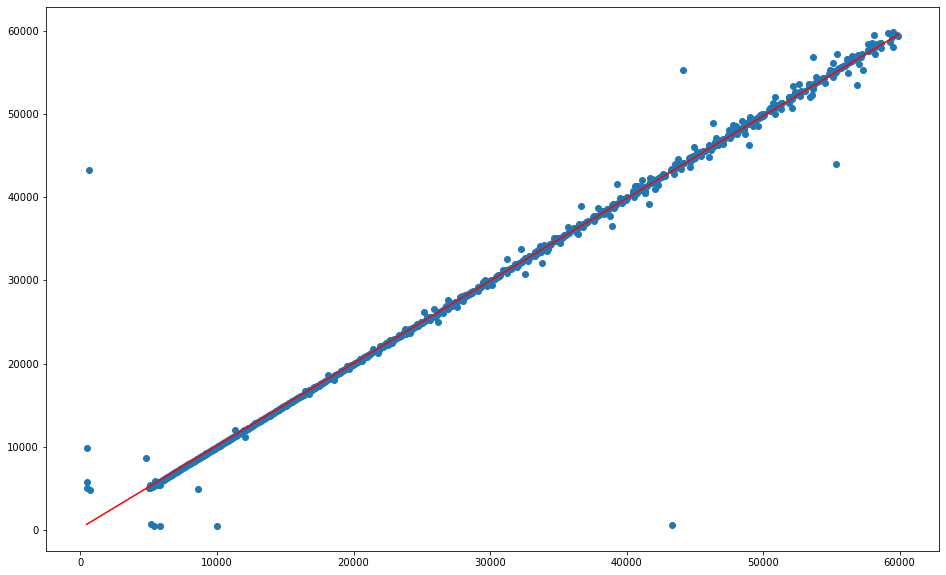

In [10]:
# worst time linear search curve fitting
data = times_worst_linear_search

x, y = data[1:], data[:-1]
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '-', color='red')
#plt.savefig('linear_worst_curve_fit.png')
plt.show()

y = 0.99392 * x + -48.26173


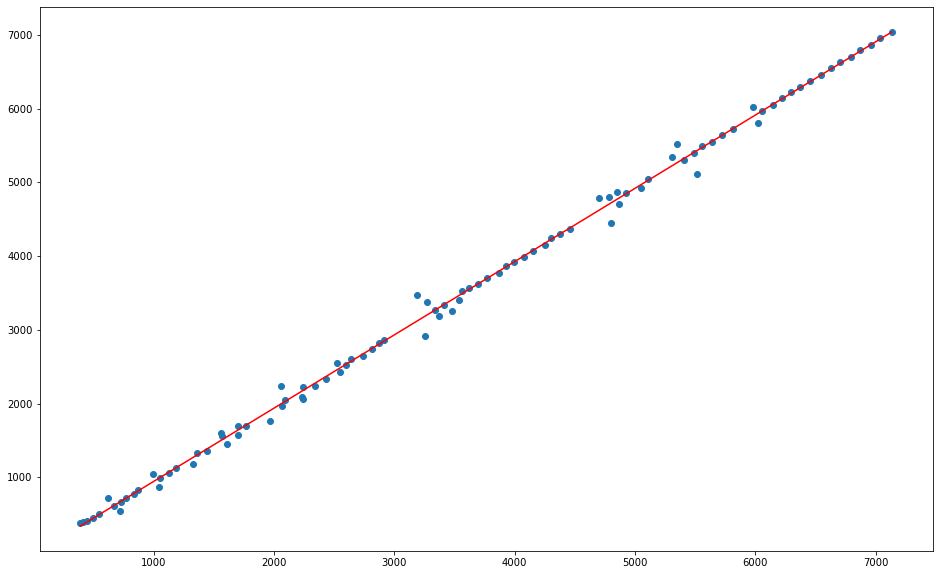

In [16]:
# iterative factorial curve fitting
data = times_iterative

x, y = data[1:], data[:-1]
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '-', color='red')
#plt.savefig('iterative_factorial_curve_fit.png')
plt.show()